In [21]:
from flask import Flask,render_template,url_for,request
import pandas as pd 
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("spam.csv", encoding="latin-1")
df

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
# Features and Labels
df['label'] = df['class'].map({'ham': 0, 'spam': 1})
X = df['message']
y = df['label']

In [7]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [8]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [12]:
unique, frequency = np.unique(y,
                              return_counts = True) 
 
# convert both into one numpy array
count = np.asarray((unique, frequency ))
 
print("The values and their frequency are:\n",
     count)

The values and their frequency are:
 [[   0    1]
 [4825  747]]


In [9]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data
X

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
nb = MultinomialNB()
parameters = {'alpha': [0.00001,0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(nb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00609223, 0.00273744, 0.        , 0.        , 0.00520833,
        0.        , 0.        , 0.00520873, 0.        , 0.00520825,
        0.00484419, 0.00200995, 0.00261346, 0.00014822, 0.        ]),
 'std_fit_time': array([0.00820664, 0.00387133, 0.        , 0.        , 0.0073657 ,
        0.        , 0.        , 0.00736626, 0.        , 0.00736558,
        0.00685072, 0.0028425 , 0.00134367, 0.00020961, 0.        ]),
 'mean_score_time': array([0.00204627, 0.        , 0.0052762 , 0.        , 0.        ,
        0.00520833, 0.        , 0.00520794, 0.        , 0.        ,
        0.00574152, 0.00221992, 0.        , 0.00425752, 0.00460776]),
 'std_score_time': array([0.00289386, 0.        , 0.00746168, 0.        , 0.        ,
        0.0073657 , 0.        , 0.00736513, 0.        , 0.        ,
        0.00811973, 0.00313943, 0.        , 0.003053  , 0.00326466]),
 'param_alpha': masked_array(data=[1e-05, 1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01,
               

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.006092,0.008207,0.002046,0.002894,0.00001,{'alpha': 1e-05},0.984089,0.976335,0.971651,0.977358,0.005129,10,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002737,0.003871,0.000000,0.000000,0.00001,{'alpha': 1e-05},0.984089,0.976335,0.971651,0.977358,0.005129,10,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.984839,0.978795,0.973663,0.979099,0.004568,9,0.999997,0.999976,1.000000,0.999991,0.000011
2,0.000000,0.000000,0.005276,0.007462,0.0005,{'alpha': 0.0005},0.985428,0.980958,0.975015,0.980467,0.004265,8,0.999987,0.999953,0.999998,0.999979,0.000019
5,0.000000,0.000000,0.005208,0.007366,0.001,{'alpha': 0.001},0.985748,0.981942,0.975718,0.981136,0.004134,6,0.999979,0.999949,0.999993,0.999974,0.000018
4,0.005208,0.007366,0.000000,0.000000,0.005,{'alpha': 0.005},0.986377,0.984448,0.977313,0.982713,0.003899,5,0.999954,0.999919,0.999984,0.999952,0.000027
7,0.005209,0.007366,0.005208,0.007365,0.01,{'alpha': 0.01},0.986775,0.985827,0.978153,0.983585,0.003861,4,0.999942,0.999864,0.999983,0.999930,0.000049
6,0.000000,0.000000,0.000000,0.000000,0.05,{'alpha': 0.05},0.987420,0.988407,0.980638,0.985488,0.003453,2,0.999805,0.999574,0.999961,0.999780,0.000159
8,0.000000,0.000000,0.000000,0.000000,0.1,{'alpha': 0.1},0.987658,0.989087,0.981310,0.986018,0.003380,1,0.999581,0.999189,0.999886,0.999552,0.000285
9,0.005208,0.007366,0.000000,0.000000,0.5,{'alpha': 0.5},0.985967,0.987740,0.979966,0.984558,0.003326,3,0.997486,0.995095,0.997776,0.996786,0.001202


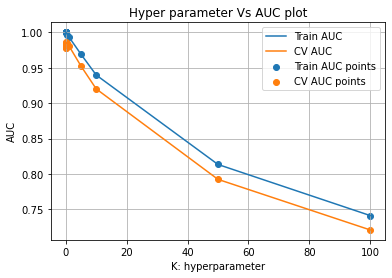

In [40]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
display(results.columns)
display(results)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alpha=  results['param_alpha']

plt.plot(alpha, train_auc, label='Train AUC')

plt.plot(alpha, cv_auc, label='CV AUC')
plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [41]:
best_alpha=0.1
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_te_pred=nb.predict(X_test)
y_te_prob=nb.predict_proba(X_test)
y_te_prob_1=y_te_prob[:,1]
y_tr_pred=nb.predict(X_train)
y_tr_prob=nb.predict_proba(X_train)
y_tr_prob_1=y_tr_prob[:,1]
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
4264    0
2439    0
5556    0
4205    0
4293    1
Name: label, Length: 1115, dtype: int64

0.9792158894645941

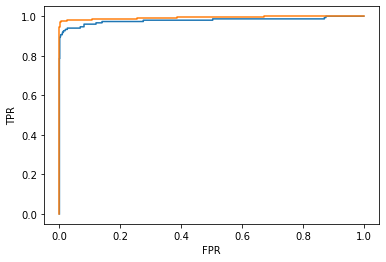

In [42]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_tr_prob_1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_prob_1)
plt.plot(test_fpr, test_tpr, label='Test ROC')
plt.plot(train_fpr, train_tpr, label='Train ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
auc(test_fpr, test_tpr)
#plt.plot(alpha, cv_auc, label='CV AUC')
#0.9859309153713298

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_te_pred)
cm

array([[953,  12],
       [ 10, 140]], dtype=int64)